## Rongo Rongo

Easter Island script taken off of a block.

Tablet P, Side A.

Currently not deciphered.

In [164]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

from scipy.spatial.distance import cdist
from tqdm.notebook import tqdm

In [15]:
image = Image.open('rongorongo.png').convert('L')

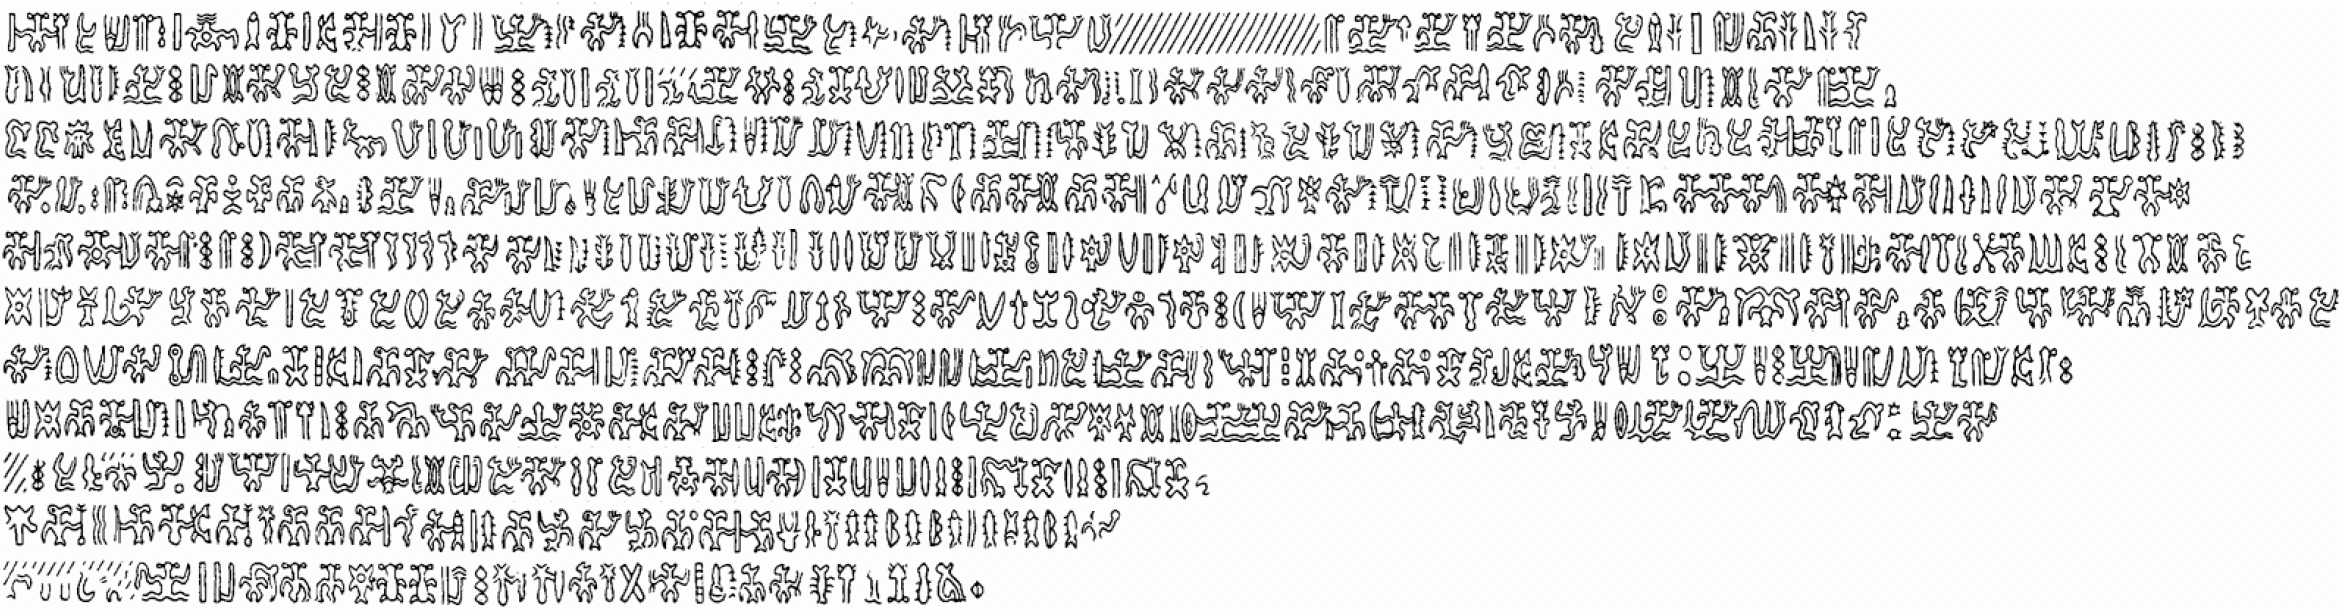

In [16]:
image

## Image Preprocessing

In [ ]:
image

In [18]:
img1.getbbox()

(0, 0, 2350, 610)

Try to split the image into different lines using a very quick segmentation algorithm.
Each of the peaks specifies a "line" in the original tablet.

In [47]:
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

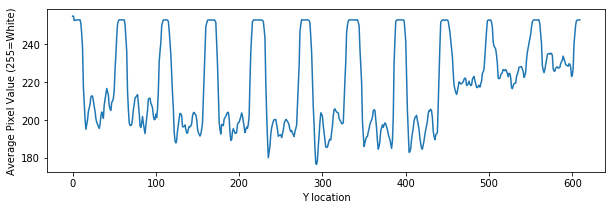

In [48]:
plt.figure(figsize=(10, 3))
plt.plot(np.array(image).mean(axis=1))
plt.ylabel("Average Pixel Value (255=White)")
plt.xlabel("Y location")
plt.show()

In [70]:
horizontal_pixels = np.array(image).mean(axis=1)
consecutive_white_lines = consecutive(np.nonzero(horizontal_pixels > 240.0)[0])
split_points = [int(np.median(a)) for a in consecutive_white_lines]

Now that we have our split points, we can split our original image into lines.

In [68]:
width, height = image.width, image.height
image_lines = [
    image.crop((0, begin, width, end))
    for begin, end in zip(split_points[:-1], split_points[1:])
]

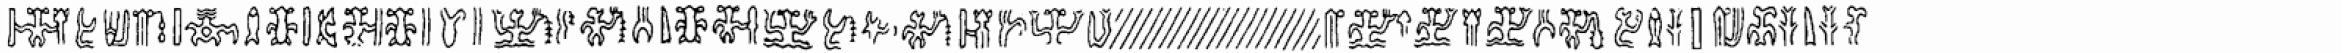

In [80]:
image_lines[0]

Now let's crop the symbols vertically.

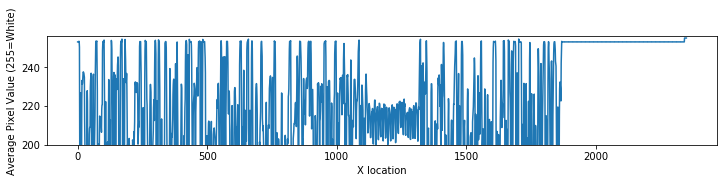

In [74]:
plt.figure(figsize=(12, 2))
plt.plot(np.array(image_lines[0]).mean(axis=0))
plt.ylabel("Average Pixel Value (255=White)")
plt.xlabel("X location")
plt.ylim((200, 256))
plt.show()

In [100]:
def split_vertically(im, split_pixel_thresh=250.0):
    """Takes in an image and splits it vertically by whitespace."""
    width, height = im.width, im.height
    SPLIT_PIXEL_THRESH = 240.0
    vertical_pixels = np.array(im).mean(axis=0)
    consecutive_white_lines = consecutive(np.nonzero(vertical_pixels > split_pixel_thresh)[0])
    split_points = [int(np.median(a)) for a in consecutive_white_lines]
    return [
        im.crop((begin, 0, end, height))
        for begin, end in zip(split_points[:-1], split_points[1:])
    ]

In [102]:
image_text = [
    split_vertically(line)
    for line in image_lines
]

We can normalize everything to 50 by 50 for convenience.

In [154]:
normalized_image_text = [
    [a.resize((50, 50)) for a in sublist]
    for sublist in image_text
]
all_glyphs = [a for sublist in normalized_image_text for a in sublist]
all_flattened_glyphs = [np.array(a).flatten() for a in all_glyphs]

Plot a few random glyphs together to see how similar they are.

In [167]:
model = HAC('centroid')
model.fit(np.stack(all_flattened_glyphs)[:200])

In [162]:
np.stack(all_flattened_glyphs).shape

(564, 2500)

In [191]:
def plot_glyph(glyph):
    plt.imshow(glyph.reshape(50, 50))
    plt.show()
    
def plot_glyphs(glyphs_list):
    n = len(glyphs_list)
    width, height = np.floor(n ** 0.5), np.ceil(n ** 0.5)
    plt.figure(figsize=(width, height))
    for idx, glyph in enumerate(glyphs_list):
        plt.subplot(height, width, idx + 1)
        plt.imshow(glyph.reshape(50, 50), cmap='Greys')
        plt.axis('off')
    plt.show()

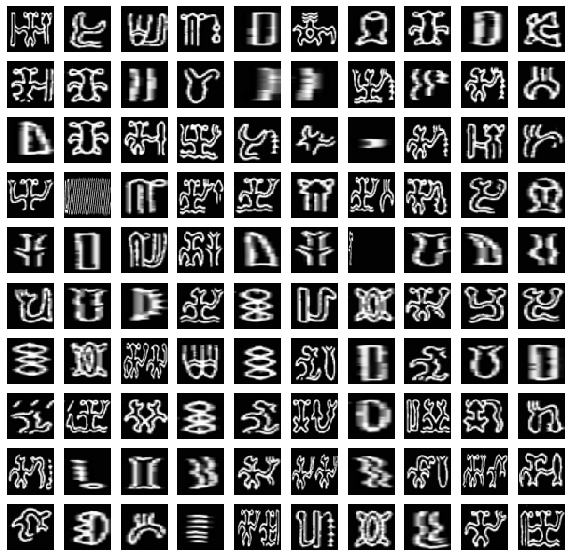

In [192]:
plot_glyphs(all_flattened_glyphs[:100])

We can get all of the glyphs and identify the "distance" away from another glyph.
This will make it interesting.